In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

In [9]:
df= pd.read_csv("train.csv")

In [10]:
df.sample(10)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
8567,8567,0.0,No,7.0,7.0,No,10.0,5.0,Extrovert
7510,7510,1.0,No,NaN,4.0,No,6.0,3.0,Extrovert
11865,11865,10.0,Yes,2.0,1.0,Yes,NaN,2.0,Introvert
443,443,4.0,Yes,1.0,7.0,Yes,2.0,7.0,Extrovert
7864,7864,2.0,No,4.0,5.0,No,5.0,8.0,Extrovert
3248,3248,0.0,No,5.0,6.0,No,4.0,8.0,Extrovert
12543,12543,0.0,No,8.0,3.0,No,7.0,9.0,Extrovert
2149,2149,3.0,No,7.0,7.0,No,13.0,10.0,Extrovert
10706,10706,0.0,No,6.0,4.0,No,8.0,5.0,Extrovert
1795,1795,2.0,No,4.0,4.0,No,12.0,0.0,Extrovert


In [11]:
df.shape

(18524, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [13]:
df.drop(columns=["id"],inplace=True)

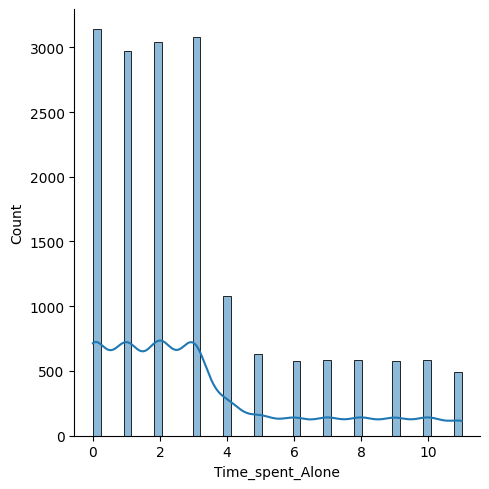

In [14]:
sns.displot(data=df,x="Time_spent_Alone",kde=True)

In [15]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [22]:
df['Stage_fear_encoded'] = df['Stage_fear'].astype('category').cat.codes
df['Drained_after_socializing_encoded'] = df['Drained_after_socializing'].astype('category').cat.codes
df['Personality_encoded'] = df['Personality'].astype('category').cat.codes


In [23]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_encoded,Drained_after_socializing_encoded,Personality_encoded
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,0,0,0
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,0,0,0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,1,-1,1
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,0,0,0
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert,0,0,0
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert,-1,0,0
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert,1,1,1
18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert,1,1,1


In [16]:
df.corr(numeric_only=True)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.628806,-0.640884,-0.598014,-0.611544
Social_event_attendance,-0.628806,1.000000,0.585224,0.566675,0.566679
Going_outside,-0.640884,0.585224,1.000000,0.549864,0.579305
Friends_circle_size,-0.598014,0.566675,0.549864,1.000000,0.522272
Post_frequency,-0.611544,0.566679,0.579305,0.522272,1.000000


In [28]:
df.drop(columns=["Stage_fear_encoded","Drained_after_socializing_encoded","Personality_encoded"],inplace=True)

In [17]:
df.sample(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2390,0.0,No,6.0,6.0,No,7.0,10.0,Extrovert
7336,1.0,No,9.0,3.0,No,7.0,4.0,Extrovert
14007,2.0,No,8.0,7.0,No,13.0,3.0,Extrovert
17399,1.0,No,6.0,6.0,No,11.0,9.0,Extrovert
3801,0.0,No,4.0,4.0,NaN,5.0,5.0,Extrovert
6010,0.0,No,9.0,3.0,NaN,4.0,3.0,Extrovert
3407,0.0,No,8.0,6.0,No,6.0,7.0,Extrovert
7139,3.0,No,7.0,3.0,No,11.0,4.0,Extrovert
18283,0.0,No,10.0,3.0,No,9.0,NaN,Extrovert
16276,3.0,No,7.0,3.0,No,12.0,3.0,Extrovert


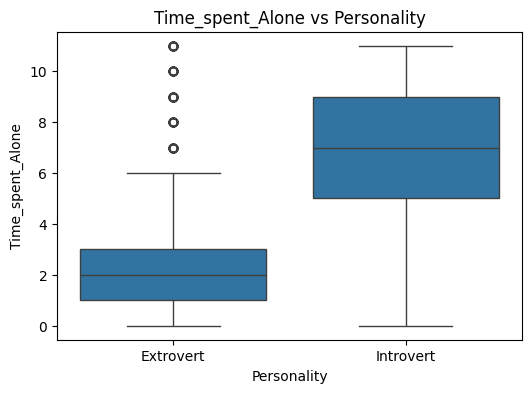

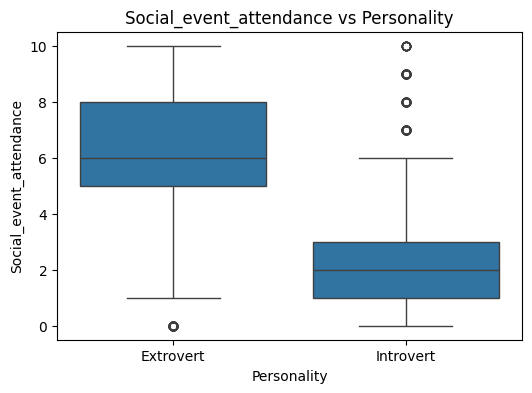

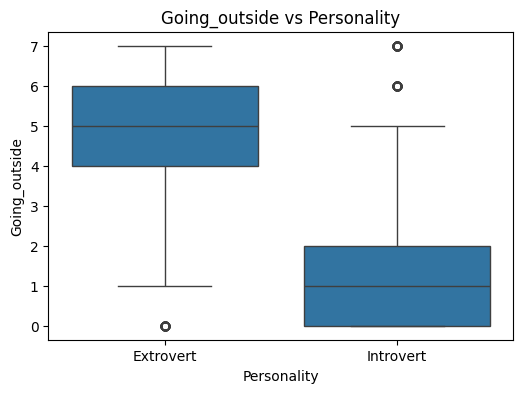

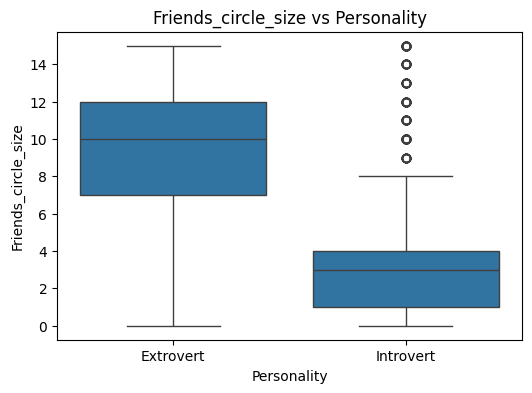

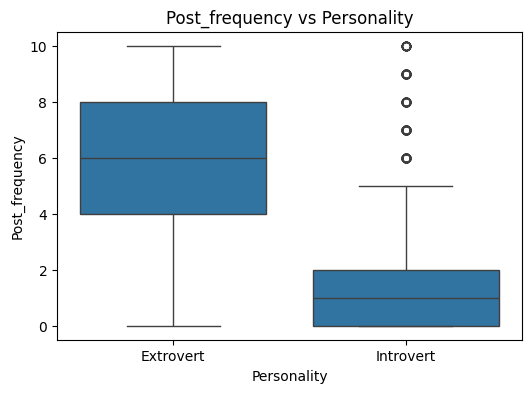

In [31]:
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'{col} vs Personality')
    plt.show()

In [18]:
df["Stage_fear"]=df["Stage_fear"].map({"Yes":1,"No":0})
df["Drained_after_socializing"]=df["Drained_after_socializing"].map({"Yes":1,"No":0})
df["Personality"]=df["Personality"].map({"Introvert":1,"Extrovert":0})

In [19]:
x=df.drop(columns=["Personality"])
y=df["Personality"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
X_train

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
7241,7.0,1.0,0.0,0.0,1.0,NaN,0.0
10037,3.0,0.0,4.0,5.0,NaN,6.0,3.0
4508,3.0,0.0,7.0,6.0,0.0,7.0,3.0
14381,1.0,0.0,3.0,6.0,0.0,4.0,5.0
2343,3.0,0.0,7.0,5.0,0.0,9.0,5.0
...,...,...,...,...,...,...,...
9225,8.0,NaN,3.0,2.0,1.0,5.0,1.0
13123,2.0,0.0,10.0,4.0,0.0,11.0,4.0
9845,2.0,0.0,7.0,6.0,0.0,15.0,5.0
10799,11.0,1.0,0.0,2.0,1.0,3.0,2.0


In [22]:
imputer = KNNImputer(n_neighbors=5)

In [23]:


X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)
x=imputer.transform(x)

In [24]:
X_train = np.round(X_train).astype(int)
X_test = np.round(X_test).astype(int)
x = np.round(x).astype(int)

In [25]:
model = DecisionTreeClassifier()

In [32]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(
    estimator=model,
    n_estimators=500,          # Number of base models
    max_samples=0.8,          # % of training samples per model
    bootstrap=False,           # Sample with replacement
    random_state=42
)

In [33]:
X_train

array([[ 7,  1,  0, ...,  1,  3,  0],
       [ 3,  0,  4, ...,  0,  6,  3],
       [ 3,  0,  7, ...,  0,  7,  3],
       ...,
       [ 2,  0,  7, ...,  0, 15,  5],
       [11,  1,  0, ...,  1,  3,  2],
       [ 0,  0,  4, ...,  0, 10,  6]], shape=(14819, 7))

In [34]:
bagging_model.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,0.8
,max_features,1.0
,bootstrap,False
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [35]:
y_pred=bagging_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9562753036437247

0.9630229419703104--200
0.9643724696356275 --100

0.9657219973009447 --50

In [37]:
from sklearn.model_selection import cross_val_score

cross_val_score(bagging_model, x, y, cv=5, scoring='accuracy').mean()

np.float64(0.956057309747204)

In [95]:
df_test=pd.read_csv("test.csv")

In [96]:
final=df_test["id"]


In [97]:
df_test.drop(columns=["id"],inplace=True)

In [98]:
df_test

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,No,7.0,4.0,No,6.0,NaN
1,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...
6170,3.0,No,5.0,5.0,No,9.0,6.0
6171,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,2.0,No,4.0,3.0,No,9.0,7.0
6173,3.0,No,4.0,4.0,No,11.0,9.0


In [99]:
df_test["Stage_fear"]=df_test["Stage_fear"].map({"Yes":1,"No":0})
df_test["Drained_after_socializing"]=df_test["Drained_after_socializing"].map({"Yes":1,"No":0})

In [100]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,0
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,0
2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,1
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,0
4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,0
...,...,...,...,...,...,...,...,...
18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,0
18520,1.0,NaN,6.0,7.0,0.0,6.0,5.0,0
18521,7.0,1.0,1.0,1.0,1.0,1.0,NaN,1
18522,NaN,1.0,1.0,0.0,1.0,5.0,2.0,1


In [101]:
df_test=imputer.transform(df_test)

In [102]:
df_test

array([[ 3. ,  0. ,  7. , ...,  0. ,  6. ,  4.4],
       [ 7.8,  1. ,  0. , ...,  1. ,  5. ,  1. ],
       [ 3. ,  0. ,  5. , ...,  0. , 15. ,  9. ],
       ...,
       [ 2. ,  0. ,  4. , ...,  0. ,  9. ,  7. ],
       [ 3. ,  0. ,  4. , ...,  0. , 11. ,  9. ],
       [ 8. ,  1. ,  1. , ...,  1. ,  1. ,  0. ]], shape=(6175, 7))

In [103]:
df_test = np.round(df_test).astype(int)

In [104]:
df_test

array([[ 3,  0,  7, ...,  0,  6,  4],
       [ 8,  1,  0, ...,  1,  5,  1],
       [ 3,  0,  5, ...,  0, 15,  9],
       ...,
       [ 2,  0,  4, ...,  0,  9,  7],
       [ 3,  0,  4, ...,  0, 11,  9],
       [ 8,  1,  1, ...,  1,  1,  0]], shape=(6175, 7))

In [105]:
final_asn=bagging_model.predict(df_test)

In [107]:
final_asn=final_asn.map({1:"Introvert",0:"Extrovert"})

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [113]:
submission = pd.DataFrame({
    "id": final,
    "Personality": final_asn
})

In [115]:
submission["Personality"]=submission["Personality"].map({1:"Introvert",0:"Extrovert"})

In [116]:
submission

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [117]:
submission.to_csv("submission.csv", index=False)